In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [14]:
class callback_function(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if logs.get('val_accuracy') > 0.98:
      print('accuracy exceeded 98% stop training')
      self.model.stop_training = True

callback_ = callback_function()

(train_data, train_label), (test_data, test_label) = keras.datasets.mnist.load_data()
train_data = train_data / 255
test_data = test_data / 255

model = keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.RMSprop(learning_rate=0.001), metrics='accuracy')

history = model.fit(train_data, train_label, epochs=20, validation_data=(test_data, test_label), callbacks=[callback_])

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2027 - accuracy: 0.9405 - val_loss: 0.0942 - val_accuracy: 0.9709
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0887 - accuracy: 0.9751 - val_loss: 0.0952 - val_accuracy: 0.9737
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0647 - accuracy: 0.9818 - val_loss: 0.0855 - val_accuracy: 0.9765
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0494 - accuracy: 0.9858 - val_loss: 0.0842 - val_accuracy: 0.9791
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0399 - accuracy: 0.9890 - val_loss: 0.0843 - val_accuracy: 0.9806


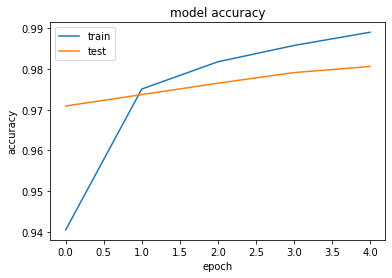

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()